# K Means

Amaç gözlemleri birnirlerine olan benzerleiklerime göre kümelere ayırmaktır. 

Kümeler eiçi benzerlik yüksek kümeler arası benzerlik düşükm olsun isteriz

- Küme saysıs belirlenir k sayıda olsun

- Rastgele k sayıda merkez seçilir

- Her gözlem için k merkezlere uzaklık hessaplanır ve kendisine en yakşn merkeze atanır.

- Atama işlemlerinden sonra oluşan kümeler için tekrardan merkez hesaplamaları yapılır

- Bu işlembelirlenen bir iterasyonnadedince devam edilir. hatası en düşük olann şekil son hal kabul edilir

In [37]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [38]:
data=pd.read_csv("USArrests.csv")
df=data.copy()
df.head()
#gördüğün gibi eyalet isimleri değişkne gibi olmuş ancak index ismi olmalılar öncelikle onu düzeltelim

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [39]:
x=df.iloc[:,0]
df.index=x
df=df.iloc[:,1:5]
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [46]:
df=df.rename_axis(index=None)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [48]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.0+ KB


In [51]:
df.describe().T
# Ne görüyoruz murder %75 lik kısım 11 iken max kısım 17 demek ki bir kaç eyalette bu bireden yükseliyor
#mesala murderın ağırlığını arttırmak istersek bir değişkne daha ekleyip 11 in üstü olanları 1 diğerlerine 0 atayabiliriz

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<AxesSubplot: title={'center': 'Murder'}>,
        <AxesSubplot: title={'center': 'Assault'}>],
       [<AxesSubplot: title={'center': 'UrbanPop'}>,
        <AxesSubplot: title={'center': 'Rape'}>]], dtype=object)

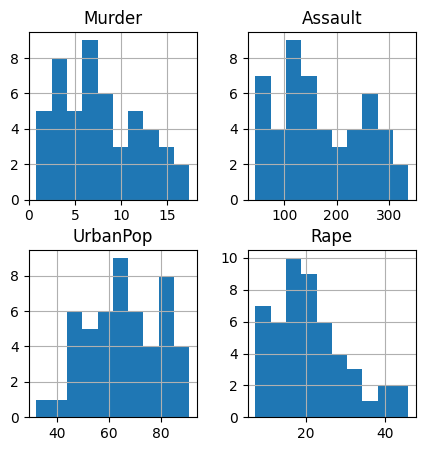

In [53]:
df.hist(figsize=(5,5))